# Project: TMDb_movie_dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> I chose  **TMDb_dataset** This dataset includes data about 10k+ movies, now the data includes the cast, user_rating, the production company and the genre.

> We'll ask this dataset questions in an attempt to understand what makes a movie successul, whether the movie's propularity affects it profits and what's the relationship between a movie's vote average and the profit it makes?


### Points of Analysis
>**Analysing by Genre**
>>* How many movies are made in each genre?
>>* what's the total quantity and total profit?
>>* What's the average profit per genre?
>>* Does high profit mean average high popularity?
>>* Do movie genres that are popular have high profit?

>**Analysing by movie**

>>* what are the most profitable and least profitable movies?
>>* what's the maximum and minimum budget for a movie?
>>* what are the top 10 movies of this dataset based on profit?
>>* Let's check the voting average for the top 10 movies
>>* what are the top 10 movies based on vote average?
>>* Checking the average vote for movies with highest vote count

>**Analysing by actor**

>>* Who are the actors who made the most movies?
>>* How much profit have these actors grossed in total?
>>* Who are the top grossing actors of all time?

>**Statistical analysis**

>>* Is there a strong relation between the profit and popularity?
>>* Do movies with higher profit get a higher voting average?
>>* What's the relationship between profit and budget?
>>* Has the movie industry been growing in profits over the past years?
>>* Has the production quantity of movies increased over the years?
>>* What is the average profit per movie every year?

In [113]:
import pandas as pd
import datetime 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sweetviz
import plotly.express as px


<a id='wrangling'></a>
## Data Wrangling
> **Loading the dataset** checking for cleanliness, to know exactly where in the dataset that needs to be trimmed or cleaned.

In [114]:
df = pd.read_csv('tmdb-movies.csv')

In [115]:
df.shape

(10866, 21)

We need to change the ('id') to string as well as fill the null values in the dataset.

In [116]:
#Changing the('id') to str
df['id'] = df['id'].astype(str)

In [117]:
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


We can see here that there are up to 50% zero values in the ('budget','revenue') columns, we must correct this to have more accurate results, my method will be to remove all zero values in both the ('budget','revenue') columns.

In [118]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

We see here that there are null values in 9 different columns, I'll be removing ('imdb_id','budget','revenue','homepage','tagline','keywords')
I'll fill the remaining null values with the 'mean'

# Data Cleaning steps:
> * Removing unneeded columns, I chose to work with the adjusted for inflation values of revenue and budget, as they'll give a more accurate results
> * Fill null values with (mean) and removing duplicates
> * Renaming columns ('revenue_adj' and 'budget_adj')
> * Remove columns in ('revenue' and 'budget') that contains 0 values
> * Creating the profit column, and adding it to the main DF.
> * Create functions for splitting the results in ('cast', genres', 'production_companies'), I checked and found that splitting and adding all of them at once affect the data negatively, therefore I'm creating the main needed functions, so that when needed I can write cleaner non-repetitive code.


##### 1- Removing unneeded columns

In [119]:
#Removing unneeded columns
to_drop = ['imdb_id','budget','revenue','homepage','tagline','keywords']
df = df.drop(to_drop, axis = 1)

In [120]:
df.head(1)

,id,popularity,original_title,cast,director,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


##### 2- replace null values with mean, as well as remove duplicates

In [121]:
#filling null values with mean
df = df.fillna(df.mean)

In [122]:
#checking for duplicates
df.duplicated().sum()

1

In [123]:
#removing the duplicate
df = df.drop_duplicates()

In [124]:
# checking the dataset
df.isnull().sum()

id                      0
popularity              0
original_title          0
cast                    0
director                0
overview                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

#### 3- Renaming ('budget_adj', 'revenue_adj') to ('budget','revenue').

In [125]:
df = df.rename(columns={'budget_adj':'budget','revenue_adj':'revenue'})

##### 4-Removing  '0' values in the revenue and budget columns
As we can see below there are many results containing (0) values in both the revenue and budget columns.
These values will definitely lead to incorrect results, so I need to deal with them here.

Because the median is also zero, we have three solutions, leave the zeros and compute the final result using them, use the mean to fill the, or remove the entire column.

I'll be removing the entire row as this will lead to the most accurate result for the remaining data.

In [126]:
# checking how many columns in the budget and revenue containing 0:
zero_budget= len(df[df.budget ==0])
zero_revenue= len(df[df.revenue ==0])
print("Number of results where budget = 0 is {}".format(zero_budget))
print("Number of results where revenue = 0 is {}".format(zero_revenue))

Number of results where budget = 0 is 5696
Number of results where revenue = 0 is 6016


In [127]:
#checking the median to see if we can substitute these values with the median:
print("the median for the budget is: {}".format(df['budget'].median()))
print("the median for the revenue is: {}".format(df['revenue'].median()))

the median for the budget is: 0.0
the median for the revenue is: 0.0


In [128]:
#removing the 0 results:
df = df[df.revenue !=0 ]
df = df[df.budget !=0]

In [129]:
#checking the median and if there are any more 0 results left:
zero_budget= len(df[df.budget ==0])
zero_revenue= len(df[df.revenue ==0])
print("Number of results where budget = 0 is {}".format(zero_budget))
print("Number of results where revenue = 0 is {}".format(zero_revenue))
print("the median for the budget is: {}".format(df['budget'].median()))
print("the median for the revenue is: {}".format(df['revenue'].median()))

Number of results where budget = 0 is 0
Number of results where revenue = 0 is 0
the median for the budget is: 30016111.9054567
the median for the revenue is: 61730679.078951746


##### 5-Creating the splitting functions needed:

Splitting the data by creating fuctions to split, index, stack, convert to DF, rename and merge with the original DF

In [130]:
#splitting the data
def split(data):
    return data.str.split('|', expand=True)

In [131]:
#stacking the results to have a more readable and accessable result
def stack(data):
    return(data.stack(dropna=True))

In [132]:
#indexing the data to be able to merge it with the main df
def indexing(data):
    return data.set_index(df['id'])

In [133]:
# changing the numpy array to DF, so that we're able to merge it with the main DF
def changing_to_df(data):
    return(pd.DataFrame(data))

In [134]:
def rename(data1,data2):
    return data1.rename(columns={0:data2})

In [135]:
#merging the datasets
def merging(data1,data2):
    return(pd.merge(data1,data2, left_index=True, right_index=True))


#####  6- Creating and adding the profit column, which is = (revenue - budget)

In [136]:
df_profit = df.revenue - df.budget
df_profit = changing_to_df(df_profit)
df_profit = indexing(df_profit)
df_profit = rename(df_profit,'profit')
df = indexing(df)
df = merging(df,df_profit)

In [137]:
df.head(1)

,id,popularity,original_title,cast,director,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget,revenue,profit
id,,,,,,,,,,,,,,,,
135397,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09


In [138]:
df.nunique()

id                      3854
popularity              3852
original_title          3808
cast                    3830
director                1714
overview                3854
runtime                  139
genres                  1053
production_companies    3009
release_date            2885
vote_count              1274
vote_average              53
release_year              56
budget                  2096
revenue                 3848
profit                  3851
dtype: int64

The Dataset is now ready for analysis

#### The amount of remaining unique movies to be analysed is (3808)

<a id='eda'></a>
## Exploratory Data Analysis

array([[<AxesSubplot:title={'center':'popularity'}>,
        <AxesSubplot:title={'center':'runtime'}>,
        <AxesSubplot:title={'center':'vote_count'}>],
       [<AxesSubplot:title={'center':'vote_average'}>,
        <AxesSubplot:title={'center':'release_year'}>,
        <AxesSubplot:title={'center':'budget'}>],
       [<AxesSubplot:title={'center':'revenue'}>,
        <AxesSubplot:title={'center':'profit'}>, <AxesSubplot:>]],
      dtype=object)

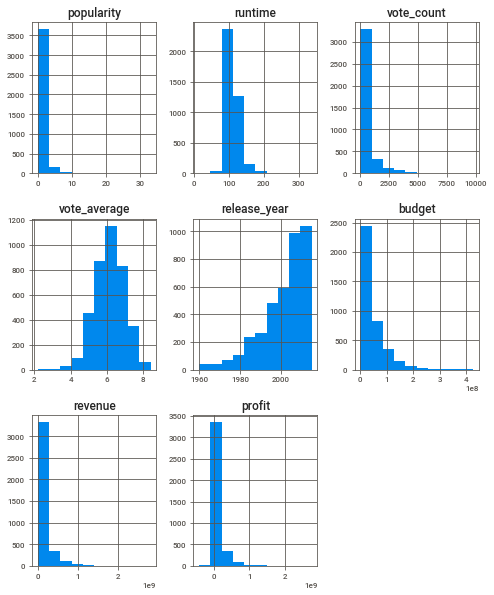

In [139]:
#creating a hist to visualize the whole dataset
df.hist(figsize=(8,10))

As we can see here almost the whole dataset is skewed to the right, except for the release_year and vote_average they're both left skewed

###  1-Analysing by Genre

What is the movie with the highest profit

how many genres are there, for that I need to split the genres column

In [140]:
#Creating a copy of the DF to work on it without affecting the original DF
df_genres= df.copy()

In [141]:
# here I'm splitting and merging the new genre column to the copied DF using the function I defined previously
#Split the values and creating an array
df_genre= split(df['genres'])
#indexing values to be able to merge in the final step
df_genre = indexing(df_genre)
#stacking the values on top of each other
df_genre = stack(df_genre)
#creating a DF
df_genre = changing_to_df(df_genre)
#Renaming
df_genre = rename(df_genre, 'genre_adj')
#Merging with the new DF
df_genres = merging(df_genres,df_genre)


### 1.1- How many movies are made in each genre?

In [142]:
# grouping by genre to check how many movies are there per genre.
df_genre_count = df_genres.groupby('genre_adj').count()['id']
#sorting values descending order
df_genre_count= df_genre_count.sort_values(ascending=False)
#Creating a dataframe to be able to name the column
df_genre_count = pd.DataFrame(df_genre_count)
#changing the name of column
df_genre_count=df_genre_count.rename(columns={'id':'Total_count'})

In [143]:
#checking the quantity comparison between genres
fig_1=px.histogram(df_genre_count,x=df_genre_count.index,y='Total_count',
                   labels={'genre_adj':'Genre', 'Total_count': 'Total Count'},
                   title='Count per Genre')
fig_1.show()

Drama is followed by the Comedy and Thriller, it would be interesting to check which genre has the highest total profit and see if it matches the results above.

### 1.2- What's the total quantity and total  profit?

In [144]:
#Grouping by genres and getting the sum of profit
df_genres_profit = df_genres.groupby('genre_adj')['profit'].sum()

In [145]:
#merging the two DataFrames into one to be able to compare properly
df_genres_profits=merging(df_genre_count,df_genres_profit)

In [146]:
df_genres_profits

,Total_count,profit
genre_adj,,
Drama,1756,1.170655e+11
Comedy,1358,1.115353e+11
Thriller,1204,1.006172e+11
Action,1085,1.399057e+11
Adventure,749,1.424237e+11
Romance,667,5.310357e+10
Crime,651,4.588578e+10
Science Fiction,519,7.086214e+10
Horror,463,2.693079e+10


In [147]:
#Using scatter bubble because we have three variables
fig_2 = px.scatter(df_genres_profits, x="profit", y=df_genres_profits.index,
	         size="Total_count", color=df_genres_profits.index,
                 hover_name="Total_count", log_x=False, size_max=60,
                labels=dict(profit='Total Profit', genre_adj= 'Genre'))
fig_2.update_layout(title_text= 'Total Profit vs Total Quantity')
fig_2.show()

As we can see here even though the Drama has the highest count of movies, the genre leading in profit is Adventure followed closely by Action.
This can only mean the the average profit for Action and Adventure is higher, let's check.

### 1.3 What's the average profit per genre?

In [148]:
#Grouping by genre to get the mean profit, to see avg profit per movie for each genre
df_genre_avg_profit= df_genres.groupby('genre_adj').mean()['profit']

df_genre_avg_profit

genre_adj
Action             1.289453e+08
Adventure          1.901517e+08
Animation          2.074852e+08
Comedy             8.213206e+07
Crime              7.048507e+07
Documentary        1.942646e+07
Drama              6.666600e+07
Family             1.726900e+08
Fantasy            1.697552e+08
Foreign           -1.644639e+05
History            6.478188e+07
Horror             5.816584e+07
Music              9.936800e+07
Mystery            7.125838e+07
Romance            7.961554e+07
Science Fiction    1.365359e+08
TV Movie           5.143802e+07
Thriller           8.356913e+07
War                9.862516e+07
Western            6.848370e+07
Name: profit, dtype: float64

In [149]:
#showcasing using scatterplot
fig_3 = px.scatter(df_genre_avg_profit, x=df_genre_avg_profit, y=df_genre_avg_profit.index,
                 color=df_genre_avg_profit.index,
                 hover_name="profit", log_x=False, size_max=60,
                  labels=dict(x='Average Profit per Movie', genre_adj='Genre'))
fig_3.update_layout(title_text= 'Average Profit per Genre')
fig_3.show()

As we can see from the above scatterplot, the Drama has an average profit per movie of 66.6mil, on the other hand Animation has
207 mil per movie, and Adventure makes 190 mil on average per movie.
Now it makes sense why Adventure has the highest overall profit.

### 1.4-Does high profit mean average high popularity?

In [150]:
#grouping by genre to see most popular genre in total
df_genre_popularity=df_genres.groupby('genre_adj').sum()['popularity']

In [151]:
#checking how popular each genre is in total
fig_4= px.bar(df_genre_popularity,
      labels=dict(value='Popularity',genre_adj='Genre'))
fig_4.update_layout(title_text='Total Propularity per Genre')

We can see here that the most popular genre is Drama, this may be due to the large quantity of the Drama movies

I'd like to check if movie genres that are popular have high profit.

### 1.5- Do movie genres that are popular have high profit?

In [152]:
#I'm going to merge the popularity average and total
df_genres_popularity_profit=merging(df_genre_popularity,df_genres_profit)

In [153]:
df_genres_popularity_profit

,popularity,profit
genre_adj,,
Action,1700.320953,1.399057e+11
Adventure,1398.902084,1.424237e+11
Animation,343.835008,4.170453e+10
Comedy,1374.731569,1.115353e+11
Crime,731.698494,4.588578e+10
Documentary,10.306017,6.799262e+08
Drama,1758.477862,1.170655e+11
Family,620.093449,7.339327e+10
Fantasy,694.708555,6.722307e+10


In [154]:
#Using scatter bubble because we have three variables to show the relationship between the popularity of a genre 
#and the overall profit
fig_5 = px.scatter(df_genres_popularity_profit, x="profit", y=df_genres_popularity_profit.index,
	         size="popularity", color=df_genres_popularity_profit.index,
                 hover_name="popularity", log_x=False, size_max=60,
                labels=dict(profit='Total Profit', genre_adj= 'Genre'))
fig_5.update_layout(title_text= 'Total Profit vs Total Popularity')
fig_5.show()

##### It is clear now that a Genre with high popularity makes higher profit in total.

## 2-Analysing by movie

### 2.1 First let's check what are the most profitable and least profitable movies?

In [155]:
#I'll create a new copy of the DataFrame to work on.
df_movies = df.copy()

In [156]:
#removing the column id
df_movies=df_movies.drop(columns='id')

In [157]:
#getting the best and worst performing movies of all time, after inflation adjusted.
df_best_movie= df.groupby('original_title').sum()['profit'].idxmax()
df_worst_movie= df.groupby('original_title').sum()['profit'].idxmin()

In [158]:
#getting full information about both movies
df_details_best= df_movies.loc[df['original_title'] == df_best_movie]
df_details_worst= df_movies.loc[df['original_title'] == df_worst_movie]

In [159]:
#merging both movies
df_merged_best_worst= pd.merge(df_details_best,df_details_worst, how='outer').transpose()
df_merged_best_worst.rename(columns={0:'Star Wars', 1:'The Warrior\'s Way'}, inplace=True)

In [160]:
df_merged_best_worst

,Star Wars,The Warrior's Way
popularity,12.037933,0.25054
original_title,Star Wars,The Warrior's Way
cast,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,George Lucas,Sngmoo Lee
overview,Princess Leia is captured and held hostage by ...,An Asian assassin (Dong-gun Jang) is forced to...
runtime,121,100
genres,Adventure|Action|Science Fiction,Adventure|Fantasy|Action|Western|Thriller
production_companies,Lucasfilm|Twentieth Century Fox Film Corporation,Boram Entertainment Inc.
release_date,3/20/77,12/2/10
vote_count,4428,74


We can see here that Star Wars (after adjusting to inflation) has done fantastically making more than 2.75$ Billion!

While The Warrior's way has lost a whopping 400$ million. Which makes sense due to this huge budget. I'd like to check if this is the highest budget ever and compare it with the lowest budget.

### 2.2- What's the maximum and minimum budget for a movie?

In [161]:
#getting the best and worst performing movies of all time, after inflation adjusted.
high_budget= df.groupby('original_title').sum()['budget'].idxmax()
low_budget= df.groupby('original_title').sum()['budget'].idxmin()

In [162]:
#getting full information about both movies
details_highest_budget= df_movies.loc[df['original_title'] == high_budget]
details_lowest_budget= df_movies.loc[df['original_title'] == low_budget]

In [163]:
#merging both movies
df_merged_budget= pd.merge(details_highest_budget,details_lowest_budget, how='outer').transpose()
df_merged_budget.rename(columns={0:'The Warrior\'s Way ', 1:'Love, Wedding, Marriage'}, inplace=True)

In [164]:
df_merged_budget

,The Warrior's Way,"Love, Wedding, Marriage"
popularity,0.25054,0.52043
original_title,The Warrior's Way,"Love, Wedding, Marriage"
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Mandy Moore|Kellan Lutz|Jessica Szohr|Autumn F...
director,Sngmoo Lee,Dermot Mulroney
overview,An Asian assassin (Dong-gun Jang) is forced to...,A happy newlywed marriage counselor's views on...
runtime,100,90
genres,Adventure|Fantasy|Action|Western|Thriller,Comedy|Romance
production_companies,Boram Entertainment Inc.,120dB Films|Scion Films|Voodoo Production Serv...
release_date,12/2/10,6/3/11
vote_count,74,55


As we can see here the highest budget ever for a movie goes to The Warrior's Way for 425$ million.

However, the lowest budget doesn't make sense, because 0.9 is way too low for a budget, meaning that this data may contain incorrect values. Which lead me to search online for the correct value of 13$ mil.

I've also checked to see whether The Warrior's Way budget was actually this high, apparently that is incorrect as the correct budget is 42$ mil.

And due to that we'll be unable to definitively decide here which is the highest budget as well as the most losing movie of all time.

### 2.3- What are the top 10 movies of this dataset based on profit?

In [165]:
#grouping by movie title to show the highest profits
top_10_movies = df_movies.groupby('original_title').sum()['profit']
top_10_movies= top_10_movies.sort_values(ascending=False).head(10)
top_10_movies = pd.DataFrame(top_10_movies)


In [166]:
top_10_movies = top_10_movies.head(10)

In [167]:
#I'll create a point plot to better see the best performing movies
tips = sns.load_dataset("tips")

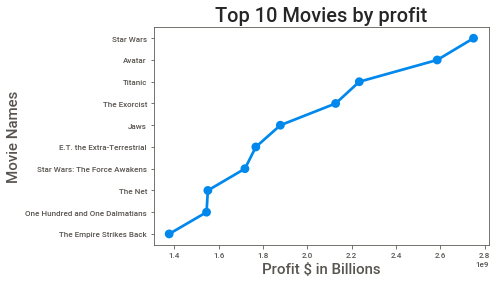

In [168]:
fig_6= sns.pointplot(x='profit',y=top_10_movies.index,data=top_10_movies)
fig_6.set_xlabel("Profit $ in Billions", fontsize = 15)
fig_6.set_ylabel("Movie Names", fontsize = 15)
fig_6.set_title('Top 10 Movies by profit', fontsize=20)
sns.set(rc = {'figure.figsize':(15,8)})

So the top 10 movies based on profit have all passed the billion barrier easily, where nu.10 (The Empire Strikes Bake) made almost 1.4$ Billion in profit.

### 2.4-Let's check the voting average for the top 10 movies:

In [169]:
#checking the average vote for the most profitable movies
top_10_movies_vote_profit = df_movies.groupby('original_title').sum()
top_10_movies_vote_profit = top_10_movies_vote_profit[['profit','vote_average']]
top_10_movies_vote_profit = top_10_movies_vote_profit.sort_values(by='profit',ascending=False).head(10)
top_10_movies_vote_profit

,profit,vote_average
original_title,,
Star Wars,2.750137e+09,7.9
Avatar,2.586237e+09,7.1
Titanic,2.234714e+09,7.3
The Exorcist,2.128036e+09,7.2
Jaws,1.878643e+09,7.3
E.T. the Extra-Terrestrial,1.767968e+09,7.2
Star Wars: The Force Awakens,1.718723e+09,7.5
The Net,1.551568e+09,5.6
One Hundred and One Dalmatians,1.545635e+09,6.6


In [170]:
#using scatter bubble to show relationship between total profit of a movie and it's voting average
fig_7 = px.scatter(top_10_movies_vote_profit, x="profit", y=top_10_movies_vote_profit.index,
	         size="vote_average", color=top_10_movies_vote_profit.index,
                 hover_name="vote_average", log_x=False, size_max=60,
                labels=dict(profit='Total Profit', genre_adj= 'Genre'))
fig_7.update_layout(title_text= 'Total Profit vs Voting Average')
fig_7.show()

As we'll see in the following analysis none of the most profitable movies have a high average vote.

### 2.5 what are the top 10 movies based on vote average?

In [171]:
#getting only the vote_count and vote abg as they're what's needed for the following
top_10_movies_voted_avg = df_movies.groupby('original_title').sum()
top_10_movies_voted_avg = top_10_movies_voted_avg[['vote_count','vote_average']]
top_10_movies_voted_avg= top_10_movies_voted_avg.sort_values(by='vote_average',ascending=False).head(10)

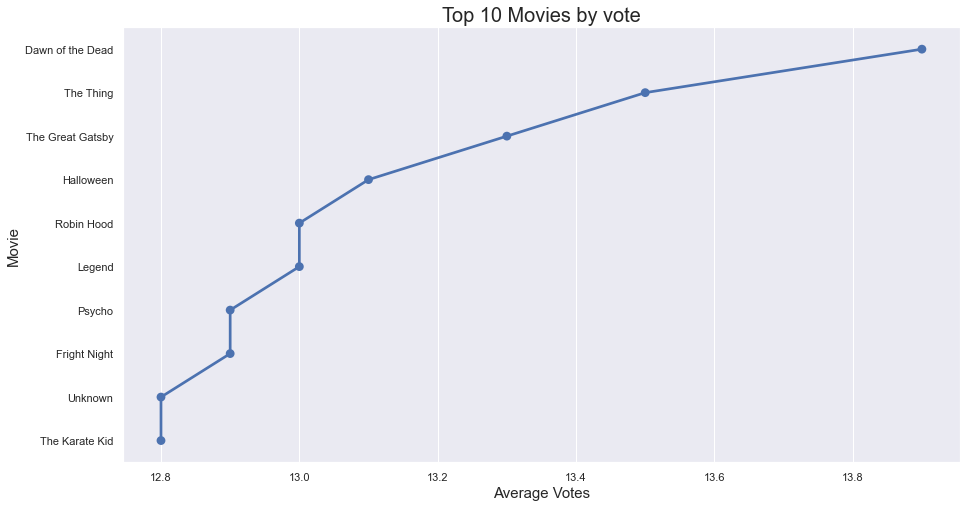

In [172]:
# Showing the highest voted movies, regardless of vote_count
fig_6= sns.pointplot(x='vote_average',y=top_10_movies_voted_avg.index,data=top_10_movies_voted_avg)
fig_6.set_xlabel("Average Votes", fontsize = 15)
fig_6.set_ylabel("Movie", fontsize = 15)
fig_6.set_title('Top 10 Movies by vote', fontsize=20)
sns.set(rc = {'figure.figsize':(10,8)})

In [173]:
#creating a scatterplot to best showcase the relationship between the top avg votes and their count of votes

fig_7 = px.scatter(top_10_movies_voted_avg, x="vote_average", y=top_10_movies_voted_avg.index,
	         size="vote_count", color=top_10_movies_voted_avg.index,
                 hover_name="vote_count", log_x=False, size_max=60,
                labels=dict(profit='Total Profit', genre_adj= 'Genre'))
fig_7.update_layout(title_text= 'The number of votes for the highest voted movies')
fig_7.show()

Very interesting, non of the top 10 profitable movies are here.

Also the vote count i very low, they highest voted movie only has 852 votes, this is unreliable, let's check the vote average for the highest vote count.

### 2.6 Checking the average vote for movies with highest vote count:

In [174]:
#getting only the vote_count and average as they're what's needed for the following 
top_10_movies_voted = df_movies.groupby('original_title').sum()
top_10_movies_voted = top_10_movies_voted[['vote_count','vote_average']]
top_10_movies_voted = top_10_movies_voted.sort_values(by='vote_count',ascending=False).head(10)

In [175]:
top_10_movies_voted

,vote_count,vote_average
original_title,,
Inception,9767,7.9
The Avengers,9024,11.9
Avatar,8458,7.1
The Dark Knight,8432,8.1
Django Unchained,7375,7.7
The Hunger Games,7080,6.7
Iron Man 3,6882,6.9
The Dark Knight Rises,6723,7.5
Interstellar,6498,8.0


In [176]:
#creating a scatterplot to best showcase the relationship between the avg and count of votes
fig_8 = px.scatter(top_10_movies_voted, x="vote_count", y=top_10_movies_voted.index,
	         size="vote_average", color=top_10_movies_voted.index,
                 hover_name="vote_average", log_x=False, size_max=60,
                labels=dict(vote_count='Vote Count', genre_adj= 'Genre'))
fig_8.update_layout(title_text= 'Highest Vote Counts')
fig_8.show()

This makes more sense as no movie is perfect, the higher the vote count the more realistic the vote average becomes.

## 3. Analysing by actor

In [177]:
#making a new copy of the data frame to modify in it without affecting the original df
df_actor = df.copy()

In [178]:
#using the formulas I previously created to get each actor individually
df_cast = split(df['cast'])
df_cast = indexing(df_cast)
df_cast = stack(df_cast)
df_cast = changing_to_df(df_cast)
df_cast = rename(df_cast, 'cast_adj')
df_actor = merging(df_actor,df_cast)

In [179]:
df_actor= df_actor.drop(columns='cast')

### 3.1- Who are the actors who made the most movies?

In [180]:
#Here I'm checking the most movies made by a single actor
top_10_actors_qtty=df_actor.groupby('cast_adj').count()['id'].sort_values(ascending=False).head(10)
top_10_actors_qtty

cast_adj
Robert De Niro       52
Bruce Willis         46
Samuel L. Jackson    44
Nicolas Cage         43
Matt Damon           36
Johnny Depp          35
Harrison Ford        34
Tom Hanks            34
Brad Pitt            34
Morgan Freeman       34
Name: id, dtype: int64

Based on this dataset the most movies made by a single actor are 52 movies.

In [181]:
#checking how popular each genre is in total
fig_9= px.bar(top_10_actors_qtty,
      labels=dict(value='Nu of Movies',cast_adj='Actor'))
fig_9.update_layout(title_text='Top 10 Actors based on movie quantity')

### 3.2 how much profit have these actors grossed in total?

In [182]:
#checking the total profit made by the same actors above
top_10_actors_qtty_profit = df_actor.groupby('cast_adj').sum()['profit']


In [183]:
#Merging into one dataframe to be able to clearly see the relationship betweeen the quantity and profit
top_merged= pd.merge(top_10_actors_qtty,top_10_actors_qtty_profit, left_index=True, right_index=True )
top_merged.rename(columns={'id':'total_number_movies'}, inplace=True)

In [184]:
top_merged

,total_number_movies,profit
cast_adj,,
Robert De Niro,52,3.808916e+09
Bruce Willis,46,5.259090e+09
Samuel L. Jackson,44,5.251745e+09
Nicolas Cage,43,2.873415e+09
Matt Damon,36,3.425010e+09
Johnny Depp,35,5.279780e+09
Harrison Ford,34,1.180842e+10
Tom Hanks,34,8.079465e+09
Brad Pitt,34,5.026563e+09


In [185]:
#creating a scatterplot to best showcase the relationship between the avg and count of votes
fig_10 = px.scatter(top_merged, x="total_number_movies", y=top_merged.index,
	         size="profit", color=top_merged.index,
                 hover_name="profit", log_x=False, size_max=60,
                labels=dict(cast_adj='Actor', total_number_movies= 'Total number of movies made by a single actor'))
fig_10.update_layout(title_text= 'profits and number of movies made by top 10 actors')
fig_10.show()

Even though Harrison ford is number 6 on the list, he made movies that grossed over 11$ Billion!

Taking a closer look the actors who grossed the most profits aren't topping this list.

So let's check who are the top grossing actors overall.

### 3.3 who are the top grossing actors of all time?

In [186]:
#Getting the sum of profit per actor to get the top 10 highest grossing actors, and checking how many movies they've made. 
top_grossing_actors = df_actor.groupby('cast_adj').sum()['profit'].sort_values(ascending=False)
top_actors_qtty=df_actor.groupby('cast_adj').count()['id'].sort_values(ascending=False)

In [187]:
#Merging into one dataframe
top_10_actors = pd.merge(top_grossing_actors,top_actors_qtty, left_index=True, right_index=True).head(10)

In [188]:
top_10_actors.rename(columns={'id':'number_of_movies'}, inplace=True)

In [189]:
#creating a scatterplot to best showcase the relationship between the avg and count of votes
fig_10 = px.scatter(top_10_actors, x="number_of_movies", y=top_10_actors.index,
	         size="profit", color=top_10_actors.index,
                 hover_name="profit", log_x=False, size_max=60,
                labels=dict(cast_adj='Actor', total_number_movies= 'Total number of movies made by a single actor'))
fig_10.update_layout(title_text= 'Top 10 Actors')
fig_10.show()

We can see here that there are 3 actors who are on a league of their own!

Harrison Ford, Tom Hanks, and Tom Cruise.

As well as the actors from Harry Potter, even though they created arount 11-12 movies they earned a stop in the top 10 grossing actors.

## 4-Doing statistical analysis to know how variables affect each other?

In [190]:
df.describe()

,popularity,runtime,vote_count,vote_average,release_year,budget,revenue,profit
count,3854.000000,3854.000000,3854.000000,3854.000000,3854.000000,3.854000e+03,3.854000e+03,3.854000e+03
mean,1.191554,109.220291,527.720291,6.168163,2001.261028,4.423999e+07,1.370647e+08,9.282470e+07
std,1.475162,19.922820,879.956821,0.794920,11.282575,4.480925e+07,2.161114e+08,1.940715e+08
min,0.001117,15.000000,10.000000,2.200000,1960.000000,9.693980e-01,2.370705e+00,-4.139124e+08
25%,0.462367,95.000000,71.000000,5.700000,1995.000000,1.309053e+07,1.835735e+07,-1.504995e+06
50%,0.797511,106.000000,204.000000,6.200000,2004.000000,3.001611e+07,6.173068e+07,2.737064e+07
75%,1.368324,119.000000,580.000000,6.700000,2010.000000,6.061307e+07,1.632577e+08,1.074548e+08
max,32.985763,338.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09,2.750137e+09


In [191]:
#Creating a function to calculate whether two variables are positively related or negatively related
def correlation(x,y):
    std_x = (x-x.mean())/x.std(ddof=0)
    std_y = (y-y.mean())/y.std(ddof=0)
    return(std_x*std_y).mean()


### 4.1 Is there a strong relation between the profit and popularity?

In [192]:
# checking the relationship between the profit below median, profit above median and their popularity.
median = df['profit'].median()
low = df.query('profit < {}'.format(median))
high = df.query('profit >= {}'.format(median))

mean_popularity_low = low['popularity'].mean()
mean_popularity_high = high['popularity'].mean()

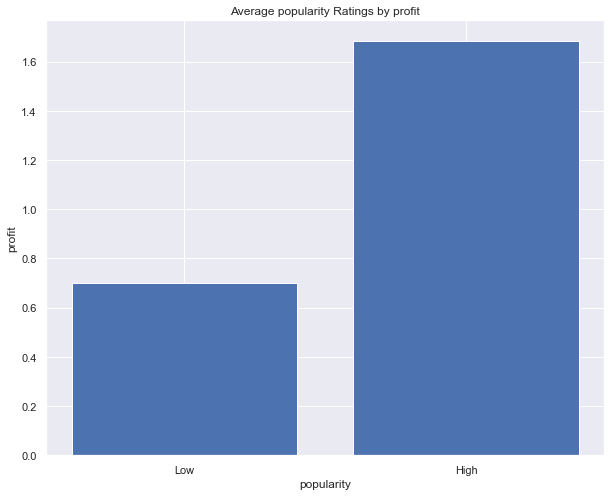

In [193]:
locations = [1, 2]
heights = [mean_popularity_low, mean_popularity_high]
labels = ['Low', 'High']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average popularity Ratings by profit')
plt.xlabel('popularity')
plt.ylabel('profit');

Seeing as there is quiet a big difference between the popularity of movies whose profit were below the median and whose profit are above the median, we can confidently assume that the more popular the move, the higher profit it'll get

In [194]:
correlation(df.profit, df.popularity)

0.516867613544863

As seen here thanks to pearson's r, there is a positive relation between profit and popularity

### 4.2- Do movies with higher profit get a higher voting average?

In [195]:
#Checking the relationship between the profit of a movie and the average vote it gets
median = df['profit'].median()
low = df.query('profit < {}'.format(median))
high = df.query('profit >= {}'.format(median))

mean_vote_average_low = low['vote_average'].mean()
mean_vote_average_high = high['vote_average'].mean()

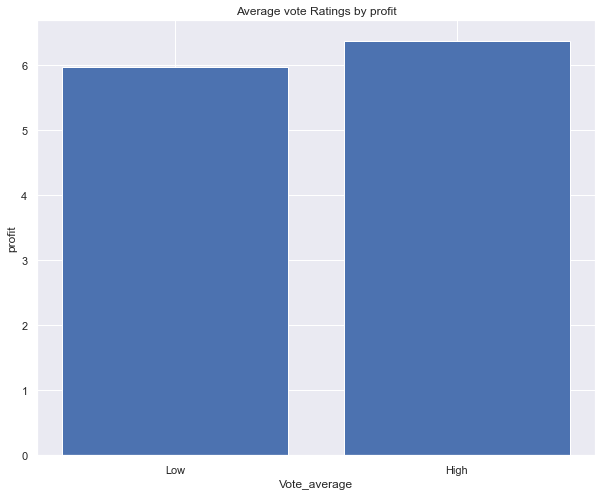

In [196]:
locations = [1, 2]
heights = [mean_vote_average_low, mean_vote_average_high]
labels = ['Low', 'High']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average vote Ratings by profit')
plt.xlabel('Vote_average')
plt.ylabel('profit');

In [197]:
correlation(df.profit, df.vote_average)

0.28865149554845326

The relationship between the profit and voting average isn't strong, it's positive however a movie can have low profit but a high vote.

### 4.3-What's the relationship between profit and budget?

In [198]:
median = df['profit'].median()
low = df.query('profit < {}'.format(median))
high = df.query('profit >= {}'.format(median))

mean_budget_low = low['budget'].mean()
mean_budget_high = high['budget'].mean()

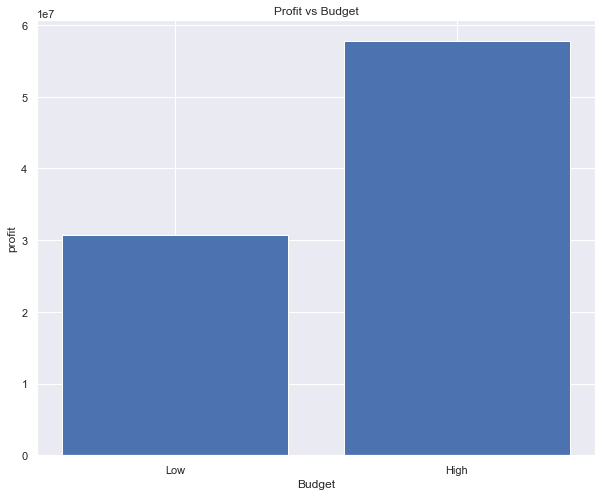

In [199]:
locations = [1, 2]
heights = [mean_budget_low, mean_budget_high]
labels = ['Low', 'High']
plt.bar(locations, heights, tick_label=labels)
plt.title('Profit vs Budget')
plt.xlabel('Budget')
plt.ylabel('profit');

In [200]:
correlation(df.profit, df.budget)

0.40434429074011513

### 4.4- Has the movie industry been growing in profits over the past years?

In [201]:
profit_for_year= df.groupby('release_year')[['profit']].sum()

In [202]:
fig_11= px.bar(profit_for_year, x=profit_for_year.index, y='profit')

In [203]:
fig_11

The movie industry in general has been growing from year to year, now let's check whether that's due to the production quantity over the years, or is it because the acerage profit has increased per movie?

### 4.5- Has the production quantity of movies increased over the years?

In [204]:
production_qntty= df_genres.groupby('release_year').count()['id']

In [205]:
fig_12= px.bar(production_qntty, x=production_qntty.index, y='id')
fig_12.update_layout(title="Number of Movies produced over the years",
                     xaxis_title="Years",
                     yaxis_title="Number of Movies",
                     legend_title="Legend Title")

### 4.6- What is the average profit per movie every year?

In [206]:
profit_per_year= df.groupby('release_year').mean()['profit']

In [207]:
fig_13= px.bar(profit_per_year, x=profit_per_year.index, y='profit')
fig_13.update_layout(title="Average profit per movie based on the year",
                     xaxis_title="Years",
                     yaxis_title="Average profit per Movie",
                     legend_title="Legend Title")

Seems that the average profit per movie was very high in the 60s, probably because the production quantity was low so most of the profits would go to select few.
However as we can see moving upwards from the 90s the average profits is between 50$mil - 120mil per movie.

<a id='conclusions'></a>
## Conclusions

Based on our analysis we can deduce the following from this dataset:

* To make a profitable movie we need to focus on what's currently popular, as the popularity and profit go hand in hand together.
* Make a movie in the animation or adventure genre as they usually have the highest profit on average.
* There is a positive correlation between high budget and profit, however the budget can only help to a certain degree, meaning that making a movie that only relies on a high budget will lead to failure.
* If our goal is primarely profit and popularity, then the ratings shouldn't be our focus, as the correlation is weak. 





### Limitations

* Almost 70% of this dataset was unusable because they contained either 0 profit or 0 budget, that would've lead to incorrect results.
* Some of the data in this dataset might be misleading, for example the worst performing movie "The Warrior's Way" supposedly lost 425 million! , however, after doing some reseach I found that it only lost 42 million.
* The highest voted movies have a very low vote-count, so the results are also misleading.
